## Digital Image Processing Exercise 1_4

Amirkabir University of Technology

Dr. Rahmati 

By Gholamrezadar 400131018

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

np.random.seed(42)


## Load Sprites

In [3]:
# Load images from a folder using glob
images = []
names = []
for img_path in glob.glob('inputs\p4\*.png'):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    names.append(img_path[img_path.rfind('\\')+1:-4])

names


['blinky_move1_down',
 'blinky_move1_left',
 'blinky_move1_right',
 'blinky_move1_up',
 'blinky_move2_down',
 'blinky_move2_left',
 'blinky_move2_right',
 'blinky_move2_up',
 'clyde_move1_down',
 'clyde_move1_left',
 'clyde_move1_right',
 'clyde_move1_up',
 'clyde_move2_down',
 'clyde_move2_left',
 'clyde_move2_right',
 'clyde_move2_up',
 'dot',
 'inky_move1_down',
 'inky_move1_left',
 'inky_move1_right',
 'inky_move1_up',
 'inky_move2_down',
 'inky_move2_left',
 'inky_move2_right',
 'inky_move2_up',
 'maze',
 'pacman_closed',
 'pacman_half_down',
 'pacman_half_left',
 'pacman_half_right',
 'pacman_half_up',
 'pacman_open_down',
 'pacman_open_left',
 'pacman_open_right',
 'pacman_open_up',
 'pinky_move1_down',
 'pinky_move1_left',
 'pinky_move1_right',
 'pinky_move1_up',
 'pinky_move2_down',
 'pinky_move2_left',
 'pinky_move2_right',
 'pinky_move2_up',
 'power_pellet']

In [4]:
def get_image(name):
    for i, n in enumerate(names):
        if n == name:
            return images[i]
    return None

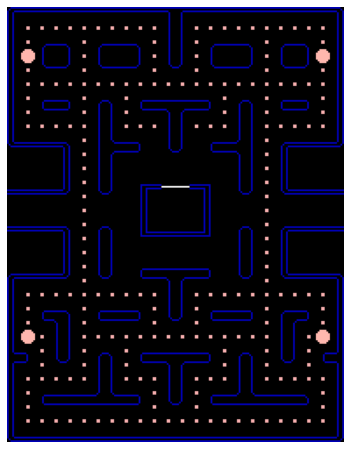

In [5]:
maze_img = get_image('maze')
maze_img_org = maze_img.copy()
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(maze_img)

## Choose Spawn Locations

214


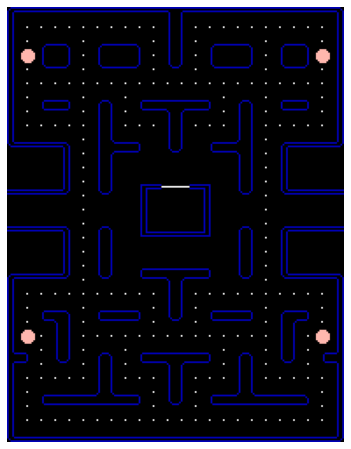

In [6]:
dots_locations = []
maze_img_copy = maze_img.copy()
for i in range(maze_img.shape[0]):
    for j in range(maze_img.shape[1]):
        # if pixel color is near pink
        if np.allclose(maze_img_copy[i, j], [248, 176, 176]):
            dots_locations.append((i, j))
            maze_img_copy[i,j] = [255,255,255]
            maze_img_copy[i+1, j+1] = [0,0,0]
            maze_img_copy[i, j+1] = [0,0,0]
            maze_img_copy[i+1, j] = [0,0,0]


plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(maze_img_copy)
print(len(dots_locations))

In [7]:
dots_indices = np.random.choice([i for i in range(len(dots_locations))], size=5, replace=False)
selected_dots_locations = np.array(dots_locations)[dots_indices]

214


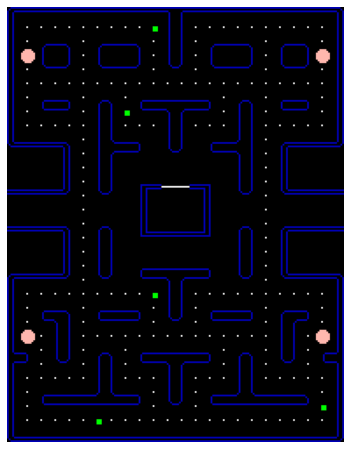

In [8]:
# visualize selected dots
for i in range(maze_img.shape[0]):
    for j in range(maze_img.shape[1]):
        # if pixel color is near pink
        for point in selected_dots_locations:
            if point[0]==i and point[1]==j:
                maze_img_copy[i:i+3,j:j+3] = [0,255,0]


plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(maze_img_copy)
print(len(dots_locations))

## Spawn Characters

## CLASSES

In [367]:
class Ghost():
    def __init__(self, name, pos, map):
        self.name=name
        self.available_directions = ['up', 'down', 'left', 'right']
        self.location = pos
        self.state = 1
        self.size = [16,14]
        
        self.remove_blocked_directions(map)

        # Pick one of the remaining directions
        self.direction = np.random.choice(self.available_directions)
    
    def remove_blocked_directions(self, map):
        margin = 3
        # Check top
        top_portion = map[self.location[0]-7-margin:self.location[0]-7, self.location[1]-6:self.location[1]+7]
        bottom_portion = map[self.location[0]+8:self.location[0]+8+margin, self.location[1]-6:self.location[1]+7]
        left_portion = map[self.location[0]-7:self.location[0]+8, self.location[1]-6-margin:self.location[1]-6]
        right_portion = map[self.location[0]-7:self.location[0]+8, self.location[1]+7:self.location[1]+7+margin]

        # check for wall in portions
        if isin(0,0,184, top_portion):
            # print("Collision Top")
            self.available_directions.remove('up')
            map[self.location[0]-7-margin:self.location[0]-7, self.location[1]-6:self.location[1]+7] = [255, 0, 0]
        if isin(0,0,184, bottom_portion):
            # print("Collision Bottom")
            self.available_directions.remove('down')
            map[self.location[0]+8:self.location[0]+8+margin, self.location[1]-6:self.location[1]+7] = [0, 255, 255]
        if isin(0,0,184, left_portion):
            # print("Collision Left")
            self.available_directions.remove('left')
            map[self.location[0]-7:self.location[0]+8, self.location[1]-6-margin:self.location[1]-6] = [255, 0, 255]
        if isin(0,0,184, right_portion):
            # print("Collision Right")
            self.available_directions.remove('right')
            map[self.location[0]-7:self.location[0]+8, self.location[1]+7:self.location[1]+7+margin] = [0, 255, 0]

    def move(self, map):
        # move
        if self.direction == 'up':
            self.location[0] -= 2
        elif self.direction == 'down':
            self.location[0] += 2
        elif self.direction == 'left':
            self.location[1] -= 2
        elif self.direction == 'right':
            self.location[1] += 2

        # check collision
        collided = False
        margin = 3

        available_directions = ['up', 'down', 'left', 'right']
        top_portion = map[self.location[0]-7-margin:self.location[0]-7, self.location[1]-6:self.location[1]+7]
        bottom_portion = map[self.location[0]+8:self.location[0]+8+margin, self.location[1]-6:self.location[1]+7]
        left_portion = map[self.location[0]-7:self.location[0]+8, self.location[1]-6-margin:self.location[1]-6]
        right_portion = map[self.location[0]-7:self.location[0]+8, self.location[1]+7:self.location[1]+7+margin]

        # check for wall in portions
        if isin(0,0,184, top_portion):
            # print("Collision Top")
            available_directions.remove('up')
            # map[self.location[0]-self.size[0]//2-5:self.location[0]-self.size[0]//2, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2] = np.ones_like(top_portion)*[255, 0, 0]
        if isin(0,0,184, bottom_portion):
            # print("Collision Bottom")
            available_directions.remove('down')
            # map[self.location[0]+self.size[0]//2:self.location[0]+self.size[0]//2+margin, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2] = np.ones_like(bottom_portion)*[0, 255, 255]
        if isin(0,0,184, left_portion):
            # print("Collision Left")
            available_directions.remove('left')
            # map[self.location[0]-self.size[0]//2-1:self.location[0]+self.size[0]//2+1, self.location[1]-self.size[1]//2-margin:self.location[1]-self.size[1]//2] = np.ones_like(left_portion)*[255, 0, 255]
        if isin(0,0,184, right_portion):
            # print("Collision Right")
            available_directions.remove('right')
            # map[self.location[0]-self.size[0]//2-1:self.location[0]+self.size[0]//2+1, self.location[1]+self.size[1]//2:self.location[1]+self.size[1]//2+margin] = np.ones_like(right_portion)*[0, 255, 0]
        
        if not self.direction in available_directions:
            collided = True

        if collided:
            # revert move
            if self.direction == 'up':
                self.location[0] += 2
            elif self.direction == 'down':
                self.location[0] -= 2
            elif self.direction == 'left':
                self.location[1] += 2
            elif self.direction == 'right':
                self.location[1] -= 2
            
            # choose new direction
            # Pick one of the remaining directions
            self.direction = np.random.choice(available_directions)

            # move again
            if self.direction == 'up':
                self.location[0] -= 2
            elif self.direction == 'down':
                self.location[0] += 2
            elif self.direction == 'left':
                self.location[1] -= 2
            elif self.direction == 'right':
                self.location[1] += 2
        

        top_portion = map[self.location[0]-7-margin:self.location[0]-7, self.location[1]-6:self.location[1]+7]
        bottom_portion = map[self.location[0]+8:self.location[0]+8+margin, self.location[1]-6:self.location[1]+7]
        left_portion = map[self.location[0]-7:self.location[0]+8, self.location[1]-6-margin:self.location[1]-6]
        right_portion = map[self.location[0]-7:self.location[0]+8, self.location[1]+7:self.location[1]+7+margin]

        # check for wall in portions
        if isin(0,0,184, top_portion):
            # print("Collision Top")
            map[self.location[0]-7-margin:self.location[0]-7, self.location[1]-6:self.location[1]+7] = [255, 0, 0]
        if isin(0,0,184, bottom_portion):
            # print("Collision Bottom")
            map[self.location[0]+8:self.location[0]+8+margin, self.location[1]-6:self.location[1]+7] = [0, 255, 255]
        if isin(0,0,184, left_portion):
            # print("Collision Left")
            map[self.location[0]-7:self.location[0]+8, self.location[1]-6-margin:self.location[1]-6] = [255, 0, 255]
        if isin(0,0,184, right_portion):
        # print("Collision Right")
            map[self.location[0]-7:self.location[0]+8, self.location[1]+7:self.location[1]+7+margin] = [0, 255, 0]
        


    def get_img(self):
        # print(self.state)
        return get_image(f"{self.name}_move{self.state}_{self.direction}")
        
    
    def render(self, map):
        map[
            self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2,
            self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2
        ] = self.get_img()

class Pacman():
    def __init__(self, pos, map):
        self.available_directions = ['up', 'down', 'left', 'right']
        self.location = pos
        self.state = 'open'
        self.size = [13,13]

        # Remove blocked directions
        self.remove_blocked_directions(map)

        # Pick one of the remaining directions
        self.direction = np.random.choice(self.available_directions)

    def remove_blocked_directions(self, map):
        margin = 2
        # Check top
        top_portion = map[self.location[0]-self.size[0]//2-margin:self.location[0]-self.size[0]//2, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2]
        bottom_portion = map[self.location[0]+self.size[0]//2:self.location[0]+self.size[0]//2+margin, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2]
        left_portion = map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]-self.size[1]//2-margin:self.location[1]-self.size[1]//2]
        right_portion = map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]+self.size[1]//2:self.location[1]+self.size[1]//2+margin]

        # check for wall in portions
        if isin(0,0,184, top_portion):
            # print("Collision Top")
            self.available_directions.remove('up')
            map[self.location[0]-self.size[0]//2-5:self.location[0]-self.size[0]//2, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2] = [255, 0, 0]
        if isin(0,0,184, bottom_portion):
            # print("Collision Bottom")
            self.available_directions.remove('down')
            map[self.location[0]+self.size[0]//2:self.location[0]+self.size[0]//2+margin, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2] = [0, 255, 255]
        if isin(0,0,184, left_portion):
            # print("Collision Left")
            self.available_directions.remove('left')
            map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]-self.size[1]//2-margin:self.location[1]-self.size[1]//2] = [255, 0, 255]
        if isin(0,0,184, right_portion):
            # print("Collision Right")
            self.available_directions.remove('right')
            map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]+self.size[1]//2:self.location[1]+self.size[1]//2+margin] = [0, 255, 0]

    def move(self, map, ghosts):
        # move
        if self.direction == 'up':
            self.location[0] -= 2
        elif self.direction == 'down':
            self.location[0] += 2
        elif self.direction == 'left':
            self.location[1] -= 2
        elif self.direction == 'right':
            self.location[1] += 2

        # check collision
        collided = False
        margin = 3

        available_directions = ['up', 'down', 'left', 'right']
        top_portion = map[self.location[0]-self.size[0]//2-margin:self.location[0]-self.size[0]//2, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2]
        bottom_portion = map[self.location[0]+self.size[0]//2:self.location[0]+self.size[0]//2+margin, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2]
        left_portion = map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]-self.size[1]//2-margin:self.location[1]-self.size[1]//2]
        right_portion = map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]+self.size[1]//2:self.location[1]+self.size[1]//2+margin]

        # check for wall in portions
        if isin(0,0,184, top_portion):
            # print("Collision Top")
            available_directions.remove('up')
            map[self.location[0]-self.size[0]//2-margin:self.location[0]-self.size[0]//2, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2] = np.ones_like(top_portion)*[255, 0, 0]
        if isin(0,0,184, bottom_portion):
            # print("Collision Bottom")
            available_directions.remove('down')
            map[self.location[0]+self.size[0]//2:self.location[0]+self.size[0]//2+margin, self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2] = np.ones_like(bottom_portion)*[0, 255, 255]
        if isin(0,0,184, left_portion):
            # print("Collision Left")
            available_directions.remove('left')
            map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]-self.size[1]//2-margin:self.location[1]-self.size[1]//2] = np.ones_like(left_portion)*[255, 0, 255]
        if isin(0,0,184, right_portion):
            # print("Collision Right")
            available_directions.remove('right')
            map[self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2, self.location[1]+self.size[1]//2:self.location[1]+self.size[1]//2+margin] = np.ones_like(right_portion)*[0, 255, 0]

        if not self.direction in available_directions:
            collided = True

        if collided:
            # revert move
            if self.direction == 'up':
                self.location[0] += 2
            elif self.direction == 'down':
                self.location[0] -= 2
            elif self.direction == 'left':
                self.location[1] += 2
            elif self.direction == 'right':
                self.location[1] -= 2
            
            # choose new direction
            # Pick one of the remaining directions
            self.direction = np.random.choice(available_directions)

            # move again
            if self.direction == 'up':
                self.location[0] -= 2
            elif self.direction == 'down':
                self.location[0] += 2
            elif self.direction == 'left':
                self.location[1] -= 2
            elif self.direction == 'right':
                self.location[1] += 2

        for ghost in ghosts:
            if np.linalg.norm(self.location-ghost.location)<5:
                return False
        return True


    def get_img(self):
        if self.state == 'close':
            return get_image('pacman_closed')
        return get_image(f"pacman_{self.state}_{self.direction}")

    def render(self, map):
        map[
            self.location[0]-self.size[0]//2:self.location[0]+self.size[0]//2+1,
            self.location[1]-self.size[1]//2:self.location[1]+self.size[1]//2+1
        ] = self.get_img()
        

In [368]:
def isin(r,g,b, img):
    ind = np.where((img[:, :, 0]==r) & (img[:, :, 1]==g) & (img[:, :, 2]==b))
    if ind[0].shape[0] > 0:
        return True

## INIT GAME

In [370]:
def init_game(maze_img):
    # Find all dots in the map
    dots_locations = []
    maze_img_copy = maze_img.copy()
    for i in range(maze_img.shape[0]):
        for j in range(maze_img.shape[1]):
            # if pixel color is near pink
            if maze_img_copy[i, j,0] == 248 and maze_img_copy[i, j,1] == 176 and maze_img_copy[i, j,2] == 176:
                dots_locations.append((i, j))
                maze_img_copy[i,j] = [255,255,255]
                maze_img_copy[i+1, j+1] = [0,0,0]
                maze_img_copy[i, j+1] = [0,0,0]
                maze_img_copy[i+1, j] = [0,0,0]
    # print("Dots locations found")
    
    # Select Random dots as spawn positions
    dots_indices = np.random.choice([i for i in range(len(dots_locations))], size=5, replace=False)
    selected_dots_locations = np.array(dots_locations)[dots_indices]
    
    # This frame
    new_maze_img = maze_img.copy()

    # Initialize Characters
    pacman = Pacman(selected_dots_locations[0], new_maze_img)
    ghosts = [
        Ghost('blinky', selected_dots_locations[1], new_maze_img),
        Ghost('clyde', selected_dots_locations[2], new_maze_img),
        Ghost('inky', selected_dots_locations[3], new_maze_img),
        Ghost('pinky', selected_dots_locations[4], new_maze_img)
    ]


    # Render Characters onto the map
    pacman.render(new_maze_img)
    maze_img[
            pacman.location[0]-pacman.size[0]//2+1:pacman.location[0]+pacman.size[0]//2+1,
            pacman.location[1]-pacman.size[1]//2+1:pacman.location[1]+pacman.size[1]//2+1
        ] = [0,0,0]
    for ghost in ghosts:
        ghost.render(new_maze_img)

    # Display the current map
    # plt.figure(figsize=(8, 8))
    # plt.axis('off')
    # plt.imshow(new_maze_img)
    cv2.imwrite('pacman_results/maze_0.png', cv2.cvtColor(new_maze_img, cv2.COLOR_RGB2BGR))
    return maze_img, pacman, ghosts

In [371]:
# np.isin(np.array([23,23,0]), maze_img, )
# ind = np.where((new_maze_img[:, :, 0]==248) & (new_maze_img[:, :, 1]==248) & (new_maze_img[:, :, 2]==0))
# ind[0].shape

In [372]:
# for i in range(maze_img.shape[0]):
#     for j in range(maze_img.shape[1]):
#         if maze_img[i, j, 1] == 248:# and maze_img[i, j, 1] == 248 and maze_img[i, j, 2] == 0:
#             print(maze_img[i, j])

## GEN DEMO

In [373]:
def gen_demo(maze_img, old_pacman, old_ghosts, frame):

    # This frame
    new_maze_img = maze_img.copy()

    # Initialize Characters
    pacman = Pacman(old_pacman.location, new_maze_img)
    pacman.direction = old_pacman.direction

    if old_pacman.state == 'close':
        pacman.state = 'half'
    elif old_pacman.state == 'half':
        pacman.state = 'open'
    elif old_pacman.state == 'open':
        pacman.state = 'close'

    # print(pacman.state)

    ghosts = [
        Ghost('blinky', old_ghosts[0].location, new_maze_img),
        Ghost('clyde', old_ghosts[1].location, new_maze_img),
        Ghost('inky', old_ghosts[2].location, new_maze_img),
        Ghost('pinky', old_ghosts[3].location, new_maze_img)
    ]
    ghosts[0].direction = old_ghosts[0].direction
    ghosts[1].direction = old_ghosts[1].direction
    ghosts[2].direction = old_ghosts[2].direction
    ghosts[3].direction = old_ghosts[3].direction

    ghosts[0].state = 2 if old_ghosts[0].state==1 else 1
    ghosts[1].state = 2 if old_ghosts[1].state==1 else 1
    ghosts[2].state = 2 if old_ghosts[2].state==1 else 1
    ghosts[3].state = 2 if old_ghosts[3].state==1 else 1



    # Render Characters onto the map
    isalive = pacman.move(new_maze_img, ghosts)
    pacman.render(new_maze_img)
    maze_img[
            pacman.location[0]-pacman.size[0]//2+1:pacman.location[0]+pacman.size[0]//2+1,
            pacman.location[1]-pacman.size[1]//2+1:pacman.location[1]+pacman.size[1]//2+1
        ] = [0,0,0]
        
    for ghost in ghosts:
        ghost.move(new_maze_img)
        ghost.render(new_maze_img)

    # Display the current map
    # plt.figure(figsize=(8, 8))
    # plt.axis('off')
    # plt.imshow(new_maze_img)
    cv2.imwrite(f'pacman_results/maze_{frame}.png', cv2.cvtColor(new_maze_img, cv2.COLOR_RGB2BGR))
    return maze_img, pacman, ghosts, isalive


## Main

In [374]:
maze_img = maze_img_org.copy()
new_maze_img, pacman, ghosts = init_game(maze_img)

In [377]:
for i in range(1,500):
    new_maze_img, pacman, ghosts,isalive = gen_demo(new_maze_img, pacman, ghosts, i)
    if not isalive:
        print("Game Over", i)
        break

Game Over 202
